# WeatherPy Analysis

In [20]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

In [21]:
# generate the latitude and longitude
n_cities = 1200
lat = np.random.uniform(low=-90.000, high=90.000, size=n_cities)
lng = np.random.uniform(low=-180.000, high=180.000, size=n_cities)

In [22]:
cities_list = []

for i in range(n_cities):
    city = citipy.nearest_city(lat[i], lng[i]).city_name
    
    # check if the city already exists in the list
    if city not in cities_list:
        cities_list.append(city)

In [23]:
len(cities_list)
#print(cities_list)

537

In [24]:
# Perform API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#city_response = requests.get(url)
#city_json = city_response.json()


# create a list to store city weather data
city_data = []
humidity = []
cloudiness = []
wind_speed = []


for city in cities_list:
    try:
        # perform the api call
        city_weather = requests.get(url + "&q=" + city).json()
        #city_json = city_weather.json()
        
        # parse the information from the API call
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        
        # append the city
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_wind_speed})
        
    except:
        # if city data does not exist in the API
        print("City not found, skipping.... " + city)
        pass
    
    

City not found, skipping.... mys shmidta
City not found, skipping.... illoqqortoormiut
City not found, skipping.... barentsburg
City not found, skipping.... karamay
City not found, skipping.... taolanaro
City not found, skipping.... bengkulu
City not found, skipping.... grand river south east
City not found, skipping.... vaitupu
City not found, skipping.... tumannyy
City not found, skipping.... talawdi
City not found, skipping.... saleaula
City not found, skipping.... belushya guba
City not found, skipping.... wahran
City not found, skipping.... nizhneyansk
City not found, skipping.... manzil tamim
City not found, skipping.... qui nhon
City not found, skipping.... qandahar
City not found, skipping.... pingzhuang
City not found, skipping.... fort saint john
City not found, skipping.... samusu
City not found, skipping.... rungata
City not found, skipping.... nguiu
City not found, skipping.... grand centre
City not found, skipping.... amderma
City not found, skipping.... umzimvubu
City no

In [25]:
# convert to dataframe
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,clyde river,90,92,70.47,-68.59,24.80,14.99
1,east london,0,88,-33.02,27.91,62.60,4.70
2,mataura,20,63,-46.19,168.86,56.18,19.62
3,katastarion,40,88,37.83,20.77,62.60,3.96
4,ushuaia,75,86,-54.81,-68.31,37.40,8.05


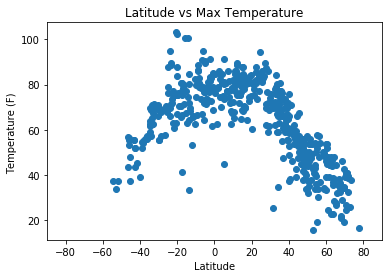

In [29]:
# Build a scatter plot for each data type

# Latitude vs Max Temp
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o")

# Add chart labels
plt.title("Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

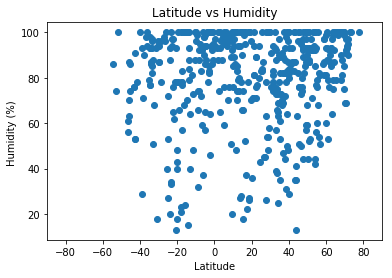

In [30]:
# Build a scatter plot for each data type

# Latitude vs Humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o")

# Add chart labels
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity (%) ")
plt.xlabel("Latitude")
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")
# Show plot
plt.show()

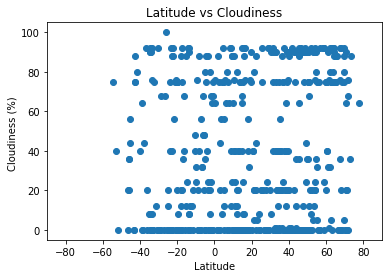

In [32]:
# Build a scatter plot for each data type

# Latitude vs Cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")

# Add chart labels
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")
# Show plot
plt.show()

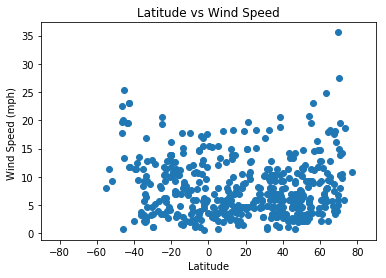

In [33]:
# Build a scatter plot for each data type

# Latitude vs Wind Speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o")

# Add chart labels
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Wind_Speed.png")
# Show plot
plt.show()